Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



Reading the dataset


In [45]:
data=pd.read_csv("indian_liver_patient.csv")



Exploratory data analysis and Data visualization

In [44]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [48]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


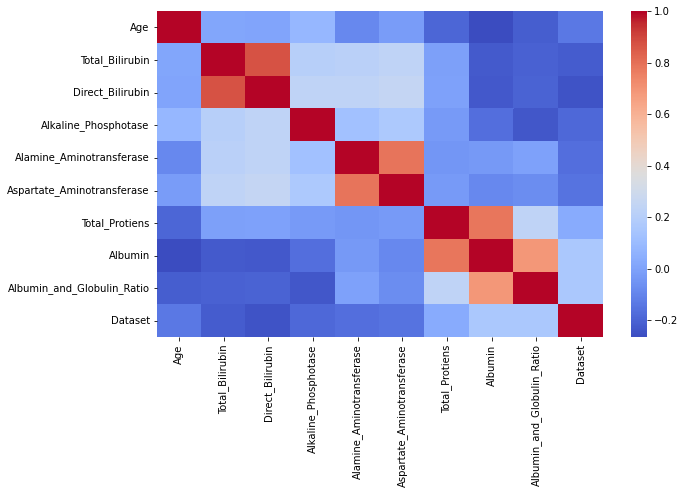

In [21]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap='coolwarm')

In [23]:
diseased=data[data['Dataset']==1]
diseased

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


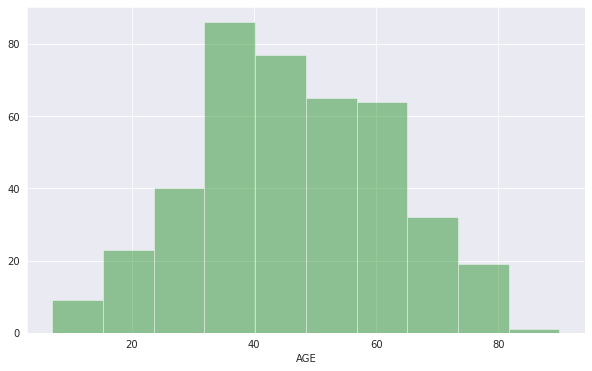

In [24]:
sns.set_style('darkgrid')
fig=plt.figure(figsize=(10,6))
sns.distplot(diseased['Age'],bins=10,kde=False,axlabel='AGE',color='green')


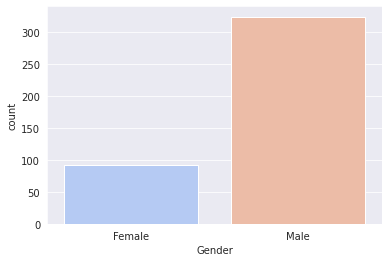

In [25]:
sns.countplot(x='Gender',data=diseased,palette='coolwarm')

In [26]:
for i in range(583):
    if data.iloc[i,10]==2:
        data.iloc[i,10]=0

In [27]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [33]:
data['Gender'].value_counts()

0    441
1    142
Name: Gender, dtype: int64

In [39]:
df = pd.get_dummies(data, columns = ['Gender'])
print(df)

     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
578   60              0.5               0.1                   500   
579   40              0.6               0.1                    98   
580   52              0.8               0.2                   245   
581   31              1.3               0.5                   184   
582   38              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                

Checking for null values and handling null values and Scaling

In [40]:
for i in range(11):
    print(sum(df.iloc[:,i].isnull())) 

0
0
0
0
0
0
0
0
4
0
0


In [41]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)
sum(df['Albumin_and_Globulin_Ratio'].isnull())

0

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Dataset',axis=1))
scaled_features = scaler.transform(df.drop('Dataset',axis=1))
liver_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
liver_scaled.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_0
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898,-1.762281,1.762281
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697,0.567446,-0.567446
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323,0.567446,-0.567446
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351,0.567446,-0.567446
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144,0.567446,-0.567446


Splitting the dataset into independent and dependent variable

In [43]:
X=liver_scaled
y=df['Dataset']

Splitting the independent and dependent features into train and test set

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,mean_absolute_error,mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
y_test.value_counts()

1    126
0     49
Name: Dataset, dtype: int64